In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
num_task=5
epochs=250

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

## Toy Example EWC Accuracy

In [3]:
acc_ewc_list = []
acc_block_diagonal_ewc_list = []
acc_sketch_ewc_list = []
acc_rank_1_ewc_list = []
acc_low_rank_ewc_list = []
acc_full_ewc_list = []
for i in range(5):
    path_ewc = './toy_example/toy_example_ewc_id_%d.pkl'%(i)
    with open(path_ewc, 'rb') as f:
        acc_ewc, acc_block_diagonal_ewc, acc_sketch_ewc, acc_rank_1_ewc, acc_low_rank_ewc, acc_full_ewc = pickle.load(f)
        acc_ewc_list.append(acc_ewc)
        acc_block_diagonal_ewc_list.append(acc_block_diagonal_ewc)
        acc_sketch_ewc_list.append(acc_sketch_ewc)
        acc_rank_1_ewc_list.append(acc_rank_1_ewc)
        acc_low_rank_ewc_list.append(acc_low_rank_ewc)
        acc_full_ewc_list.append(acc_full_ewc)

In [4]:
acc_ewc = get_mean_acc_on_iterations(acc_ewc_list)
acc_block_diagonal_ewc = get_mean_acc_on_iterations(acc_block_diagonal_ewc_list)
acc_sketch_ewc = get_mean_acc_on_iterations(acc_sketch_ewc_list)
acc_rank_1_ewc = get_mean_acc_on_iterations(acc_rank_1_ewc_list)
acc_low_rank_ewc = get_mean_acc_on_iterations(acc_low_rank_ewc_list)
acc_full_ewc = get_mean_acc_on_iterations(acc_full_ewc_list)

In [5]:
acc_ewc_final = np.array([get_mean_acc(acc_ewc_list[i],epochs)[-1] for i in range(5)])
acc_block_diagonal_ewc_final = np.array([get_mean_acc(acc_block_diagonal_ewc_list[i],epochs)[-1] for i in range(5)])
acc_sketch_ewc_final = np.array([get_mean_acc(acc_sketch_ewc_list[i],epochs)[-1] for i in range(5)])
acc_rank_1_ewc_final = np.array([get_mean_acc(acc_rank_1_ewc_list[i],epochs)[-1] for i in range(5)])
acc_low_rank_ewc_final = np.array([get_mean_acc(acc_low_rank_ewc_list[i],epochs)[-1] for i in range(5)])
acc_full_ewc_final = np.array([get_mean_acc(acc_full_ewc_list[i],epochs)[-1] for i in range(5)])
print(acc_ewc_final.mean(), acc_ewc_final.std())
print(acc_block_diagonal_ewc_final.mean(), acc_block_diagonal_ewc_final.std())
print(acc_sketch_ewc_final.mean(), acc_sketch_ewc_final.std())
print(acc_rank_1_ewc_final.mean(), acc_rank_1_ewc_final.std())
print(acc_low_rank_ewc_final.mean(), acc_low_rank_ewc_final.std())
print(acc_full_ewc_final.mean(), acc_full_ewc_final.std())

0.8795999999999999 0.07336715886553055
0.7933999999999999 0.09790168537875124
0.921 0.06748259034743699
0.8320000000000001 0.12114247809913746
0.9394 0.038091206334270836
0.9574 0.05390955388426065


In [10]:
from scipy import stats
stats.ttest_rel(acc_ewc_final,acc_sketch_ewc_final,alternative='less')

Ttest_relResult(statistic=-0.8877071381419751, pvalue=0.2124266674463126)

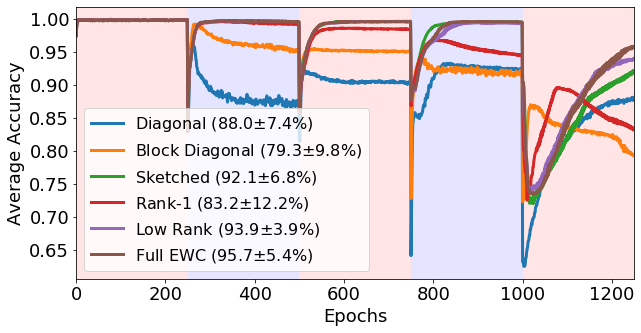

In [16]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_block_diagonal_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_sketch_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_rank_1_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_low_rank_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_full_ewc,epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend([r'Diagonal (88.0$\pm$7.4%)',
            r'Block Diagonal (79.3$\pm$9.8%)',
            r'Sketched (92.1$\pm$6.8%)',
            r'Rank-1 (83.2$\pm$12.2%)',
            r'Low Rank (93.9$\pm$3.9%)',
            r'Full EWC (95.7$\pm$5.4%)'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig("figure/toy_ewc_accuracy.pdf", bbox_inches='tight')
plt.show()

In [7]:
print(get_mean_acc(acc_ewc,epochs)[-1],
      get_mean_acc(acc_block_diagonal_ewc,epochs)[-1],
      get_mean_acc(acc_sketch_ewc,epochs)[-1],
      get_mean_acc(acc_rank_1_ewc,epochs)[-1],
      get_mean_acc(acc_low_rank_ewc,epochs)[-1],
      get_mean_acc(acc_full_ewc,epochs)[-1])

0.8796000000000002 0.7934 0.921 0.8320000000000001 0.9394 0.9574000000000001


## Toy Example MAS Accuracy

In [8]:
acc_mas_list = []
acc_block_diagonal_mas_list = []
acc_sketch_mas_list = []
acc_rank_1_mas_list = []
acc_low_rank_mas_list = []
acc_full_mas_list = []
for i in range(5):
    path_mas = './toy_example/toy_example_mas_id_%d.pkl'%(i)
    with open(path_mas, 'rb') as f:
        acc_mas, acc_block_diagonal_mas, acc_sketch_mas, acc_rank_1_mas, acc_low_rank_mas, acc_full_mas = pickle.load(f)
        acc_mas_list.append(acc_mas)
        acc_block_diagonal_mas_list.append(acc_block_diagonal_mas)
        acc_sketch_mas_list.append(acc_sketch_mas)
        acc_rank_1_mas_list.append(acc_rank_1_mas)
        acc_low_rank_mas_list.append(acc_low_rank_mas)
        acc_full_mas_list.append(acc_full_mas)

In [9]:
acc_mas = get_mean_acc_on_iterations(acc_mas_list)
acc_block_diagonal_mas = get_mean_acc_on_iterations(acc_block_diagonal_mas_list)
acc_sketch_mas = get_mean_acc_on_iterations(acc_sketch_mas_list)
acc_rank_1_mas = get_mean_acc_on_iterations(acc_rank_1_mas_list)
acc_low_rank_mas = get_mean_acc_on_iterations(acc_low_rank_mas_list)
acc_full_mas = get_mean_acc_on_iterations(acc_full_mas_list)

In [10]:
acc_mas_final = np.array([get_mean_acc(acc_mas_list[i],epochs)[-1] for i in range(5)])
acc_block_diagonal_mas_final = np.array([get_mean_acc(acc_block_diagonal_mas_list[i],epochs)[-1] for i in range(5)])
acc_sketch_mas_final = np.array([get_mean_acc(acc_sketch_mas_list[i],epochs)[-1] for i in range(5)])
acc_rank_1_mas_final = np.array([get_mean_acc(acc_rank_1_mas_list[i],epochs)[-1] for i in range(5)])
acc_low_rank_mas_final = np.array([get_mean_acc(acc_low_rank_mas_list[i],epochs)[-1] for i in range(5)])
acc_full_mas_final = np.array([get_mean_acc(acc_full_mas_list[i],epochs)[-1] for i in range(5)])
print(acc_mas_final.mean(), acc_mas_final.std())
print(acc_block_diagonal_mas_final.mean(), acc_block_diagonal_mas_final.std())
print(acc_sketch_mas_final.mean(), acc_sketch_mas_final.std())
print(acc_rank_1_mas_final.mean(), acc_rank_1_mas_final.std())
print(acc_low_rank_mas_final.mean(), acc_low_rank_mas_final.std())
print(acc_full_mas_final.mean(), acc_full_mas_final.std())

0.8311 0.055675308710414886
0.7656000000000001 0.11924319687093263
0.8591000000000001 0.0952173303553507
0.8551 0.09229485359433648
0.8421 0.09760297126624785
0.8994 0.07149503479263435


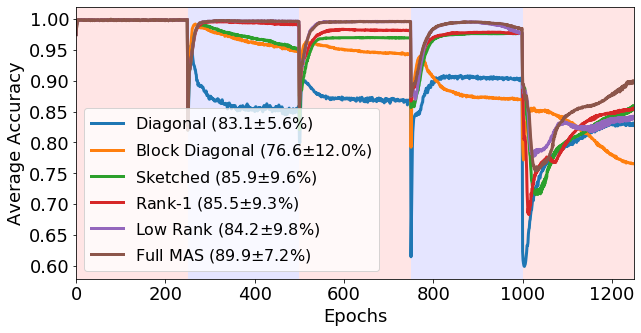

In [17]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_block_diagonal_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_sketch_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_rank_1_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_low_rank_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_full_mas,epochs),linewidth=3)
plt.xlim(0,num_task*epochs)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend([r'Diagonal (83.1$\pm$5.6%)',
            r'Block Diagonal (76.6$\pm$12.0%)',
            r'Sketched (85.9$\pm$9.6%)',
            r'Rank-1 (85.5$\pm$9.3%)',
            r'Low Rank (84.2$\pm$9.8%)',
            r'Full MAS (89.9$\pm$7.2%)'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig("figure/toy_mas_accuracy.pdf", bbox_inches='tight')
plt.show()

In [12]:
print(get_mean_acc(acc_mas,epochs)[-1],
      get_mean_acc(acc_block_diagonal_mas,epochs)[-1],
      get_mean_acc(acc_sketch_mas,epochs)[-1],
      get_mean_acc(acc_rank_1_mas,epochs)[-1],
      get_mean_acc(acc_low_rank_mas,epochs)[-1],
      get_mean_acc(acc_full_mas,epochs)[-1])

0.8311 0.7656000000000001 0.8591000000000001 0.8551 0.8421 0.8994
